In [11]:
import iminuit 
import h5py
import warnings
warnings.filterwarnings("ignore")

def BPLSpec(E, norm, index1, index2, E_break):
    return norm*5e-9*   np.piecewise(E, ((E<E_break), (E>=E_break)), (lambda E: (E/E_break)**-index1, lambda E: (E/E_break)**-index2))
    

def FitSpectrumBPL(E, flux, fluxunc, index1=None, index2=None, E_break=None, print_level=1):
    '''
    Fit a broken-power-law spectrum to the input data.
    
    :params E: energies corresponding to flux
    :params flux: flux of spectrum
    :params fluxunc: uncertainty on flux (single gaussian value)
    :params index1: Low energy spectral index. if None, float, otherwise fix to specified value
    :params index2: High energy spectral index. if None, float, otherwise fix to specified value
    :params E_break: Break energy in units of the input spectrum.
    '''
    def f(norm, index1, index2, E_break):
        '''Calculate chisq'''
        model = BPLSpec(E, norm, index1, index2, E_break)        
        chisq = np.sum( ((flux-model)/fluxunc)**2 )
        return np.log(chisq)
            
    E_break_val=2.
    E_break_fixed = False
    if E_break is not None:
        E_break_val = E_break
        E_break_fixed=True
        
    index1_val=2
    index1_fixed = False
    if index1 is not None:
        index1_val = index1
        index1_fixed=True
    
    index2_val=3
    index2_fixed = False
    if index2 is not None:
        index2_val = index2
        index2_fixed=True
    
    m = iminuit.Minuit( f, print_level=print_level, index1=index1_val, norm=1., index2=index2_val, E_break=E_break_val, errordef=1., 
                        error_norm=.5, error_E_break=.1, error_index1=.1, error_index2=.1,
                        limit_index1=[None,None],  limit_norm=[0,None],  limit_index2=[0,None], limit_E_break=[0,None],
                      fix_E_break=E_break_fixed, fix_index1=index1_fixed, fix_index2=index2_fixed)
    m.migrad()
    try: 
        m.minos()
    except: 
        m.hesse()
    reduced_chisq = m.fval/(len(flux)-4-1) # 4 params, reduced chisq

    return m, reduced_chisq
    

h = h5py.File('../mod_c/mod_k_1_XCO_stripped.hdf5')
fit = h['/fit_results/scan_radius'].attrs
avR = [.5*(r1+r2) for r1, r2 in fit['radius']]
E = fit['energies']/1e3
flux = fit['flux_ring_1']*1e3
fluxunc = fit['fluxunc_ring_1'][:,1]*1e3

bad_bins = []
for i_f, fu in enumerate(fluxunc):
    if fu==0:
        fluxunc[i_f] = 1e50
        bad_bins.append(i_f)

m, reduced_chisq = FitSpectrumBPL(E, flux, fluxunc)
for i in bad_bins: 
    fluxunc[i] = 0
    
print reduced_chisq


FCN = 3.6589008546 
 TOTAL NCALL = 236 
 NCALLS = 236 
 
 
 EDM = 3.82089914416e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,norm,9.338978e+00,9.156574e+00,0.000000e+00,0.000000e+00,0.0,,
2,index1,1.132426e+00,7.561113e-01,0.000000e+00,0.000000e+00,,,
3,index2,2.407784e+00,3.468358e-01,0.000000e+00,0.000000e+00,0.0,,
4,E_break,1.699114e+00,8.480483e-01,0.000000e+00,0.000000e+00,0.0,,


Error,-9.15657419903,9.15657419903
Valid,False,False
At Limit,True,False
Max FCN,False,False
New Min,False,False


Error,-4.092408886,0.835274087228
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.370600740933,0.725107673484
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-1.05702022107,0.848048289173
Valid,True,False
At Limit,False,False
Max FCN,False,False
New Min,False,False


0.192573729189


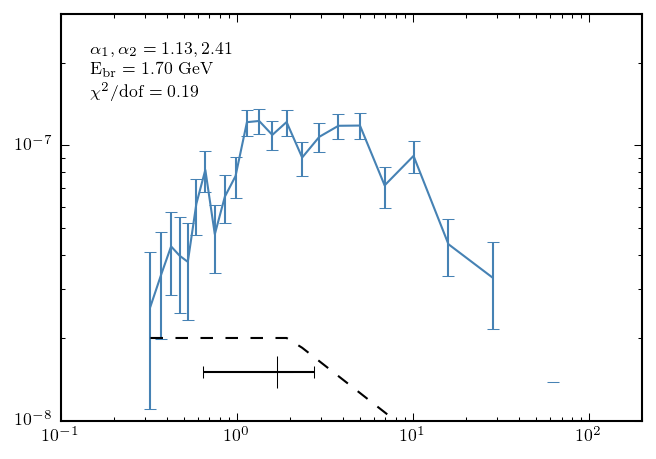

In [12]:




x_lab, y_lab = 0.05, 0.9
model = BPLSpec(E,**m.values)
model = BPLSpec(E,1,2,2.5,2)
plt.ylim(1e-8, 3e-7)
plt.xlim(.1, 2e2)
plt.loglog(E, E**2*model, color='k',ls='--')
plt.errorbar(E,E**2*flux,E**2*fluxunc.T)
E_br = m.values['E_break']
plt.errorbar(E_br,plt.ylim()[0]*1.5, xerr=(m.get_merrors()['E_break'].lower), marker='+',markersize=15, color='k')
plt.text(x_lab, y_lab, r'$\alpha_1, \alpha_2 = %1.2f, %1.2f$'%(m.values['index1'],m.values['index2']), transform=plt.gca().transAxes, fontsize=8)
plt.text(x_lab, y_lab-.055, r'$ \rm E_{br}=%1.2f\ GeV$'%m.values['E_break'], transform=plt.gca().transAxes, fontsize=8)
plt.text(x_lab, y_lab-.1, r'$\chi^2/{\rm dof}=%1.2f$'%reduced_chisq, transform=plt.gca().transAxes, fontsize=8)
         
    
    
    

    

In [13]:
import cPickle as pickle
import h5py
import sys
sys.path.append('/data/GCE_sys/')
import Analysis

import warnings
warnings.filterwarnings("ignore")

import iminuit 
import h5py


def BPLSpec(E, norm, index1, index2, E_break):
    return norm*5e-9*   np.piecewise(E, ((E<E_break), (E>=E_break)), (lambda E: (E/E_break)**-index1, lambda E: (E/E_break)**-index2))
    

def FitSpectrumBPL(E, flux, fluxunc, index1=None, index2=None, E_break=None, print_level=1):
    '''
    Fit a broken-power-law spectrum to the input data.
    
    :params E: energies corresponding to flux
    :params flux: flux of spectrum
    :params fluxunc: uncertainty on flux (single gaussian value)
    :params index1: Low energy spectral index. if None, float, otherwise fix to specified value
    :params index2: High energy spectral index. if None, float, otherwise fix to specified value
    :params E_break: Break energy in units of the input spectrum.
    '''
    def f(norm, index1, index2, E_break):
        '''Calculate chisq'''
        model = BPLSpec(E, norm, index1, index2, E_break)        
        chisq = np.sum( ((flux-model)/fluxunc)**2 )
        return np.log(chisq)
            
    E_break_val=2.
    E_break_fixed = False
    if E_break is not None:
        E_break_val = E_break
        E_break_fixed=True
        
    index1_val=2
    index1_fixed = False
    if index1 is not None:
        index1_val = index1
        index1_fixed=True
    
    index2_val=3
    index2_fixed = False
    if index2 is not None:
        index2_val = index2
        index2_fixed=True
    
    m = iminuit.Minuit( f, print_level=print_level, index1=index1_val, norm=1., index2=index2_val, E_break=E_break_val, errordef=1., 
                        error_norm=.5, error_E_break=.1, error_index1=.1, error_index2=.1,
                        limit_index1=[0,None],  limit_norm=[0,None],  limit_index2=[0,None], limit_E_break=[0,None],
                      fix_E_break=E_break_fixed, fix_index1=index1_fixed, fix_index2=index2_fixed)
    m.migrad()
    try: 
        m.minos()
    except: 
        m.hesse()
    reduced_chisq = m.fval/(len(flux)-4-1) # 4 params, reduced chisq

    return m, reduced_chisq



def PlotRadialSpectra(start, stop, text):
    
    A = Analysis.Analysis(nside=256)
    npix_roi = np.nonzero(A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]
    area_ratios = None
    
    models = ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    
    for i, model in enumerate(models):
        if i%1==0:
            h = h5py.File('../mod_c/'+model)
            fit = h['/fit_results/scan_radius'].attrs
            avR = [.5*(r1+r2) for r1, r2 in fit['radius']]
            
            E = fit['energies']
            
            # Find closest energy
            #E_bin = np.argmin(np.abs(energy-E))
            
            if area_ratios is None:
                area_ratios = [npix_roi/float(np.nonzero(A.GenRadialMask(r1,r2,plane_mask=2.)*A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]) for r1, r2 in fit['radius']]
            
            radial_prof = [area_ratios[i_r]*E**2/1e3*fit['flux_ring_%i'%i_r] for i_r in range(len(avR))]
            radial_prof_unc = np.array([area_ratios[i_r]*E**2/1e3*fit['fluxunc_ring_%i'%i_r][:,1] for i_r in range(len(avR))])
            
            
            for i_r,r in enumerate(avR):
                
                if r > 25:
                    continue
                
                plt.subplot(6,3,i_r+1)
                if i==4:
                    plt.yscale('log')
                    plt.xscale('log')
                    plt.ylim(1e-8, 1e-5)
                    plt.xlim(3e-1,1e2)
                    plt.text(.75, .88, r'$\psi=%1.1f$ deg'%r, transform=plt.gca().transAxes, fontsize=8, color='k')    
                    plt.text(.75, .79,text, transform=plt.gca().transAxes, fontsize=8, color='k')    
                    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
                    plt.xlabel(r'$\rm{E\ [GeV]}$')
                    plt.errorbar(E/1e3, radial_prof[i_r], radial_prof_unc[i_r,], color='firebrick', alpha=(i+3)/14., marker='')
                    

                    
                    # ------------------------------------------------------------
                    # FITTING THE SPECTRUM 
                    fit_E = E[:-1]/1e3
                    flux = radial_prof[i_r][:-1]/(fit_E**2*1e3)
                    fluxunc = radial_prof_unc[i_r][:-1]/(fit_E**2*1e3)

                    bad_bins = []
                    for i_f, fu in enumerate(fluxunc):
                        if fu==0:
                            fluxunc[i_f] = 1e50
                            bad_bins.append(i_f)

                    m, reduced_chisq = FitSpectrumBPL(fit_E, flux, fluxunc, print_level=0)
                    for i in bad_bins: 
                        fluxunc[i] = 0
                    
                    x_lab, y_lab = 0.05, 0.25
                    if r>14:
                        y_lab += .65
                    model = BPLSpec(E/1e3,**m.values)
                    plt.loglog(E/1e3, E**2/1e3*model, color='k',ls='--')
                    #plt.errorbar(E,E**2*flux,E**2*fluxunc.T)
                    E_br = m.values['E_break']
                    #print m.get_merrors().keys(), (m.get_merrors()['E_break'].lower, m.get_merrors()['E_break'].upper)
                    #print (np.abs(m.get_merrors()['E_break'].lower), m.get_merrors()['E_break'].upper)
                    
                    try:
                        xerr = (np.abs((m.get_merrors()['E_break'].lower, m.get_merrors()['E_break'].upper),),).T
                    except:
                        xerr = m.errors['E_break']
                    
                    plt.errorbar(E_br,plt.ylim()[0]*1.5, xerr=xerr, marker='o',markersize=4, color='k')
                    print m.values['index1'],m.values['index2']
                    plt.text(x_lab, y_lab, r'$\alpha_1, \alpha_2 = %1.2f, %1.2f$'%(m.values['index1'],m.values['index2']), transform=plt.gca().transAxes, fontsize=8)
                    plt.text(x_lab, y_lab-.075, r'$ \rm E_{br}=%1.2f\ GeV$'%m.values['E_break'], transform=plt.gca().transAxes, fontsize=8)
                    plt.text(x_lab, y_lab-.14, r'$\chi^2/{\rm dof}=%1.2f$'%reduced_chisq, transform=plt.gca().transAxes, fontsize=8)
                    # ------------------------------------------------------------
                    
                    
                else:
                    plt.loglog(E/1e3, radial_prof[i_r], color='firebrick', alpha=(i+3)/14.)
            

    
    
    plt.legend(frameon=False, fontsize=10, ncol=1)        
    
    plt.text(.04, .65, r'Light to Dark: $f_{\rm H2} \in [0,0.5,\Delta=.05]$',transform=plt.gca().transAxes, fontsize=8, color='firebrick')
    #plt.text(.04, .15, r'E=%1.2f GeV'%(E[E_bin]/1e3),transform=plt.gca().transAxes, fontsize=8, color='k')
    

0.641022244602 2.52756519518
0.0682460580926 2.35848937868
-0.182837599064 2.42408732101
0.164926240814 2.49140178802
0.964110923638 2.51243442775
1.19264361485 2.61505996342
0.830659562788 2.52229255216
0.490076653735 2.79906999981
1.32463566905 2.72665430304
0.934459868502 3.04088436032
-1.1234161918 23.0129016304
0.385292279465 4.87991647483


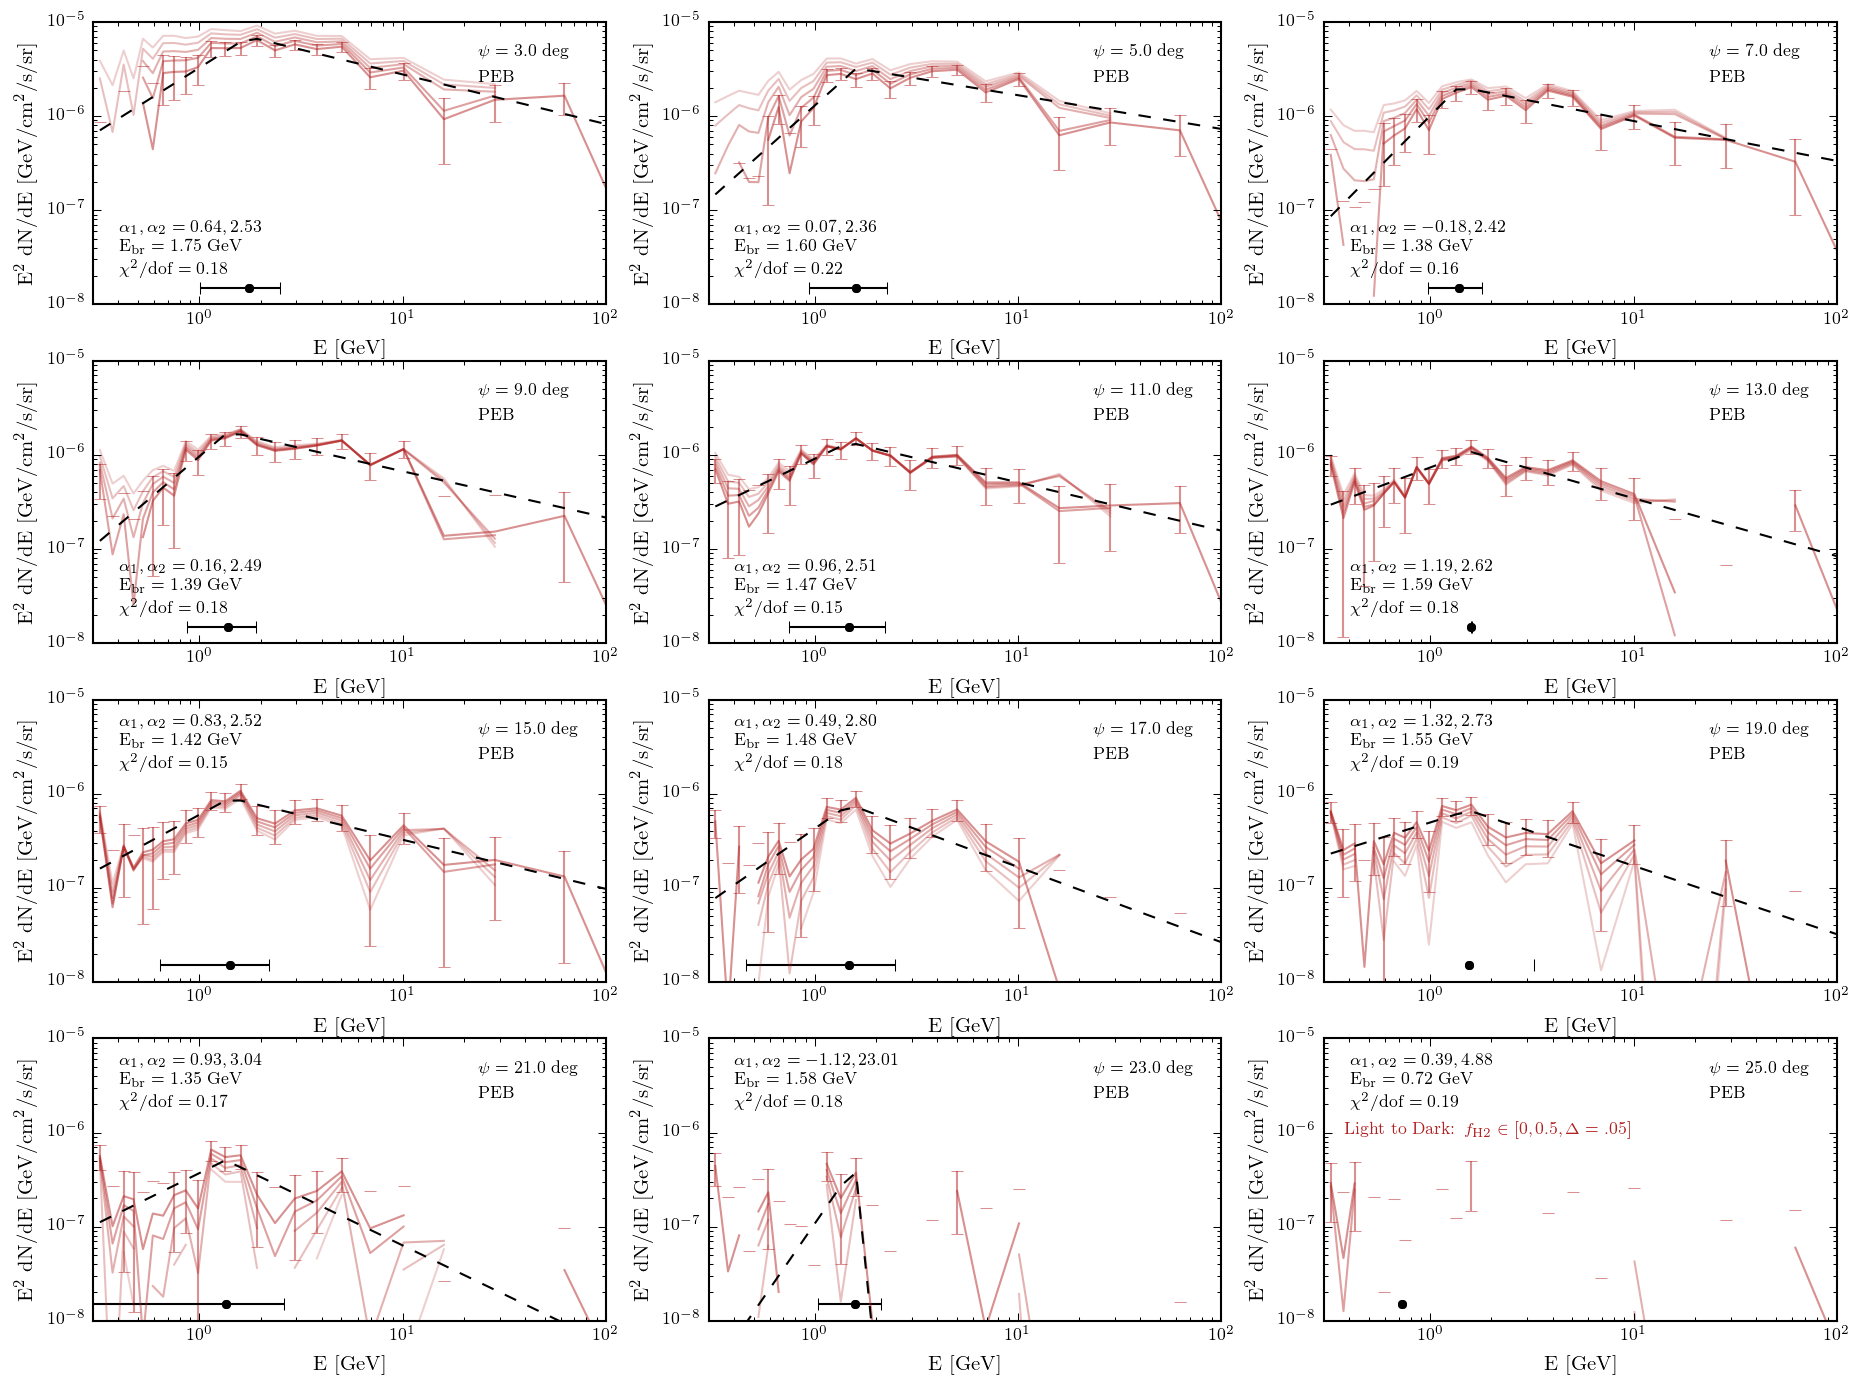

In [14]:
plt.figure(figsize=(15,17))
PlotRadialSpectra(0, 5, text='PEB')
plt.show()
# plt.figure(figsize=(8,12))
# PlotRadialSpectra(43, 54, text='Galprop')

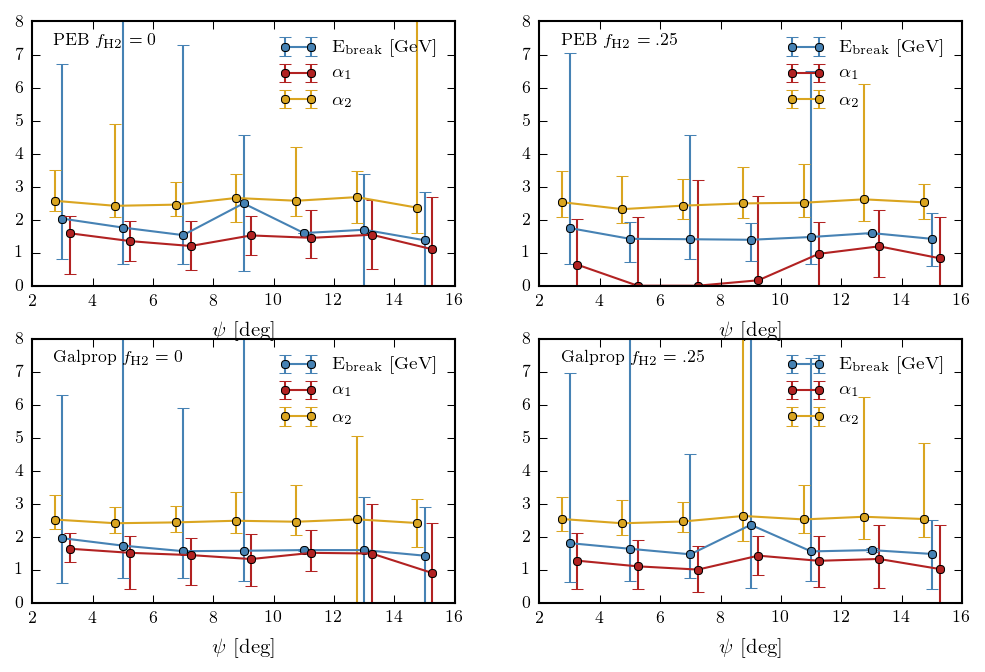

In [15]:



def PlotFitParameters(model, text, sp ):
    
    alpha1_list, alpha2_list, e_break_list = [], [], []
    alpha1_err_list, alpha2_err_list, e_break_err_list = [], [], []
    r_list = [] 
    
    A = Analysis.Analysis(nside=256)
    npix_roi = np.nonzero(A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]
    area_ratios = None
        
    h = h5py.File('../mod_c/mod_k_%i_XCO_stripped.hdf5'%model)
    fit = h['/fit_results/scan_radius'].attrs
    avR = [.5*(r1+r2) for r1, r2 in fit['radius']]

    E = fit['energies']

    if area_ratios is None:
        area_ratios = [npix_roi/float(np.nonzero(A.GenRadialMask(r1,r2,plane_mask=2.)*A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]) for r1, r2 in fit['radius']]

    radial_prof = [area_ratios[i_r]*E**2/1e3*fit['flux_ring_%i'%i_r] for i_r in range(len(avR))]
    radial_prof_unc = np.array([area_ratios[i_r]*E**2/1e3*fit['fluxunc_ring_%i'%i_r][:,1] for i_r in range(len(avR))])

    for i_r,r in enumerate(avR):
        if r > 16:
            continue
        # ------------------------------------------------------------
        # FITTING THE SPECTRUM 
        fit_E = E[:-1]/1e3
        flux = radial_prof[i_r][:-1]/(fit_E**2*1e3)
        fluxunc = radial_prof_unc[i_r][:-1]/(fit_E**2*1e3)
        r_list.append(r)
        bad_bins = []
        for i_f, fu in enumerate(fluxunc):
            if fu==0:
                fluxunc[i_f] = 1e50
                bad_bins.append(i_f)

        m, reduced_chisq = FitSpectrumBPL(fit_E, flux, fluxunc, print_level=0)
        for i in bad_bins: 
            fluxunc[i] = 0

        x_lab, y_lab = 0.05, 0.3
        model = BPLSpec(E/1e3,**m.values)
        #plt.loglog(E/1e3, E**2/1e3*model, color='k',ls='--')
        #plt.errorbar(E,E**2*flux,E**2*fluxunc.T)
        e_break_list.append(m.values['E_break'],)
        #print m.get_merrors()['E_break'].upper, m.get_merrors()['E_break'].lower
        alpha1_list.append(m.values['index1'],)
        alpha2_list.append(m.values['index2'],)
        #e_break_err_list.append(m.errors['E_break'],)
        try:
            e_break_err_list.append([m.get_merrors()['E_break'].lower, m.get_merrors()['E_break'].upper],)
            alpha1_err_list.append([m.get_merrors()['index1'].lower, m.get_merrors()['index1'].upper],)
            alpha2_err_list.append([m.get_merrors()['index2'].lower, m.get_merrors()['index2'].upper],)
        except:
            e_break_err_list.append([m.values['E_break'], m.values['E_break']],)
            alpha1_err_list.append([m.values['index1'], m.values['index1']])
            alpha2_err_list.append([m.values['index2'], m.values['index2']])
        
    plt.subplot(2,2,sp)
    r_list = np.array(r_list)
    plt.errorbar(r_list, e_break_list, np.abs(np.array(e_break_err_list).T), marker='o',markersize=4, label=r'$\rm E_{break}\ [GeV]$')
    plt.errorbar(r_list+.25, alpha1_list, np.abs(np.array(alpha1_err_list).T),marker='o',markersize=4, label=r'$\alpha_1$')
    plt.errorbar(r_list-.25, alpha2_list, np.abs(np.array(alpha2_err_list).T),marker='o',markersize=4, label=r'$\alpha_2$')
    plt.text(.05, .90, text, transform=plt.gca().transAxes, fontsize=8)
    plt.legend(frameon=False)
    plt.xlabel(r'$\rm \psi\ [deg]$')
    plt.ylim(0, 8)
    
plt.figure(figsize=(8,5)) 
PlotFitParameters(0,r'PEB $f_{\rm H2}=0$',1)
PlotFitParameters(4,r'PEB $f_{\rm H2}=.25$',2)
PlotFitParameters(43,r'Galprop $f_{\rm H2}=0$',3)
PlotFitParameters(47,r'Galprop $f_{\rm H2}=.25$',4)